# PRISM: Fourier Series Smoothing

The relatively continuous weather parameters need to undergo Fourier series smoothing.

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\PRISM\Other_Weather'

In [4]:
IN_WET = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochas' \
         r'tic_CC_Recharge\Data\JNotes\Processed\PRISM\Other_Weather\OWeathWetDF_Ave_1981-2010.pickle'
IN_DRY = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\D' \
         r'ata\JNotes\Processed\PRISM\Other_Weather\OWeathDryDF_Ave_1981-2010.pickle'

In [5]:
SM_NUM = 5    # start truncation; low pass of first 5 frequencies

In [6]:
WetDF = pd.read_pickle( IN_WET )

In [7]:
display( HTML( WetDF.head().to_html() ))

,Wet Counts,Tmax_C,Tmean_C,Tmin_C,DewPtT_C,RelHum
1,785,13.712601,8.445713,3.179865,4.530597,76.717133
2,1232,9.976487,5.294390,0.613130,0.380227,71.264763
3,1383,9.723934,6.327738,2.932181,1.498156,71.914009
4,1017,11.842480,9.620141,7.398853,7.358495,86.066818
5,606,14.576825,10.042038,5.508214,3.994192,67.780457


In [8]:
display( HTML( WetDF.describe().to_html() ))

,Wet Counts,Tmax_C,Tmean_C,Tmin_C,DewPtT_C,RelHum
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1191.000000,23.780521,18.310371,12.841178,12.341877,69.568794
std,466.172118,7.796989,7.207663,6.720217,6.098970,6.705070
min,116.000000,5.353183,1.345500,-2.662259,-6.157397,45.485897
25%,823.500000,17.299726,12.070835,7.052336,7.359571,65.110132
50%,1167.500000,24.684669,19.064235,13.817456,13.871386,68.930077
75%,1486.250000,30.968058,25.254879,19.585598,18.133408,74.383703
max,2477.000000,35.892395,29.002529,22.298576,19.930300,86.066818


In [9]:
OutCols = list( WetDF.columns )
OutCols.remove('Wet Counts')
OutCols

['Tmax_C', 'Tmean_C', 'Tmin_C', 'DewPtT_C', 'RelHum']

In [10]:
DryDF = pd.read_pickle( IN_DRY )

In [11]:
display( HTML( DryDF.head().to_html() ))

,Dry Counts,Tmax_C,Tmean_C,Tmin_C,DewPtT_C,RelHum
1,5515,17.903906,9.645109,1.387330,-0.093056,52.334858
2,5068,16.247789,8.936866,1.626929,0.716911,58.484921
3,4917,16.465973,8.716794,0.968457,0.384967,58.167614
4,5283,16.773483,8.698633,0.624711,-1.041544,52.405388
5,5694,16.082010,8.515889,0.950740,-1.081723,52.928741


In [12]:
display( HTML( DryDF.describe().to_html() ))

,Dry Counts,Tmax_C,Tmean_C,Tmin_C,DewPtT_C,RelHum
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,5095.803279,26.841141,19.454428,12.068671,9.198496,52.893932
std,507.342315,6.882986,7.504230,8.152940,7.092865,3.497991
min,1173.000000,13.034418,5.749109,-1.745239,-4.197724,41.403664
25%,4808.750000,20.752249,12.409417,4.417158,2.022405,50.491363
50%,5123.000000,27.654769,20.028086,12.311822,9.826087,53.060383
75%,5474.500000,33.644610,27.273471,20.593480,17.009058,55.223491
max,6184.000000,36.129406,29.285568,22.858006,18.607635,66.210846


## Fourier Smoothing of Temperature Parameters

### Wet State

In [13]:
AllDays = np.array( WetDF.index, dtype=np.float32 ) + 0.5

In [14]:
Tmax = np.array( WetDF['Tmax_C'], dtype=np.float32 )

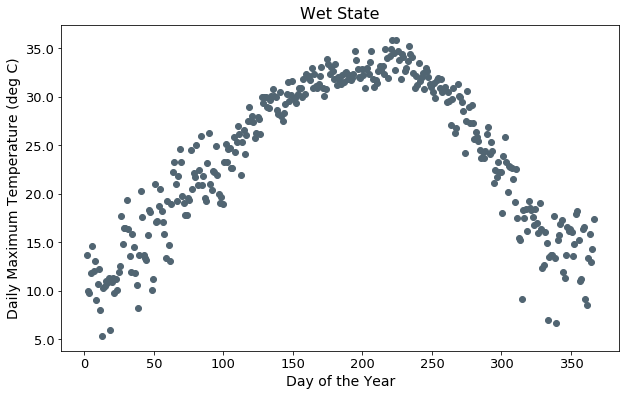

In [15]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("Wet State", fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Try the Fourier series transform

In [16]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

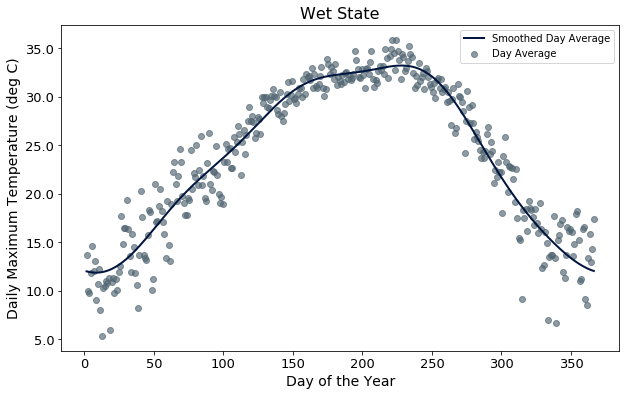

In [17]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [18]:
Tave = np.array( WetDF['Tmean_C'], dtype=np.float32 )

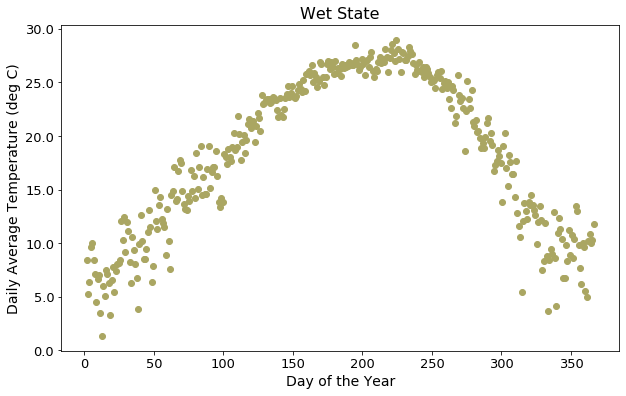

In [19]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tave, c='xkcd:khaki', marker='o' )
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Average Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [22]:
N = len( Tave )
N

366

In [21]:
rft = np.fft.rfft(Tave)
len(rft)

184

In [23]:
# get our frequencies, f for our periods, j. Which means the sinusoid executes j complete 
# cycles within 366 days
f1 = 1/N
f2 = 2/N
f3 = 3/N
f4 = 4/N
f5 = 5/N
f1, f2, f3, f4, f5

(0.00273224043715847,
 0.00546448087431694,
 0.00819672131147541,
 0.01092896174863388,
 0.01366120218579235)

In [24]:
1/f1, 1/f2, 1/f3, 1/f4, 1/f5

(366.0, 183.0, 122.0, 91.5, 73.2)

In [26]:
rft[0], rft[1], rft[2], rft[3], rft[4]

((6701.59562253952+0j),
 (-1734.9019284632927+421.3118537145698j),
 (-237.2452230278455-100.815437646704j),
 (-2.6220860248181044-44.33266372407836j),
 (4.241617666948467+54.201373955049455j))

In [27]:
Tave.mean()

18.310371

In [28]:
rft[1:] = 0.0
tst1 = np.fft.irfft(rft)

In [29]:
# returns the mean
tst1

array([18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31037055,
       18.31037055, 18.31037055, 18.31037055, 18.31037055, 18.31

In [ ]:
rft = np.fft.rfft(Tave)
rft[SM_NUM:] = 0.0
tave_smooth = np.fft.irfft(rft)

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tave, c='xkcd:khaki', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tave_smooth, linestyle='-', color='xkcd:dark brown', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Average Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
Tmin = np.array( WetDF['Tmin_C'], dtype=np.float32 )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o' )
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tave_smooth, linestyle='-', color='xkcd:dark brown', linewidth=2.0, 
           label="Smoothed Average")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
OutCols

In [ ]:
DaysIndexer = np.array( WetDF.index, dtype=np.int32 )
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tave_smooth,
             OutCols[2] : tmin_smooth,
           }
OutWetDF = pd.DataFrame(index=DaysIndexer, data=DataDict )

### Dry State

In [ ]:
Tmax = np.array( DryDF['Tmax_C'], dtype=np.float32 )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("Dry State", fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
Tave = np.array( DryDF['Tmean_C'], dtype=np.float32 )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tave, c='xkcd:adobe', marker='o' )
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Average Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
rft = np.fft.rfft(Tave)
rft[SM_NUM:] = 0.0
tave_smooth = np.fft.irfft(rft)

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tave, c='xkcd:adobe', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tave_smooth, linestyle='-', color='xkcd:faded red', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Average Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
Tmin = np.array( DryDF['Tmin_C'], dtype=np.float32 )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o' )
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tave_smooth, linestyle='-', color='xkcd:faded red', linewidth=2.0, 
           label="Smoothed Average")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tave_smooth,
             OutCols[2] : tmin_smooth,
           }
OutDryDF = pd.DataFrame(index=DaysIndexer, data=DataDict )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
OutDryDF.plot( y=OutCols[0], color='xkcd:electric blue', linewidth=2.0, ax=ax11, 
               label='Dry Maximum' )
OutWetDF.plot( y=OutCols[0], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='Wet Maximum' )
OutDryDF.plot( y=OutCols[1], color='xkcd:faded red', linewidth=2.0, ax=ax11, 
               label='Dry Average' )
OutWetDF.plot( y=OutCols[1], color='xkcd:dark brown', linewidth=2.0, ax=ax11, 
               label='Wet Average' )
OutDryDF.plot( y=OutCols[2], color='xkcd:frog green', linewidth=2.0, ax=ax11, 
               label='Dry Minimum' )
OutWetDF.plot( y=OutCols[2], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='Wet Minimum' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

## Fourier Smoothing of Dewpoint and Relative Humidity

### Wet State

In [ ]:
Dpoint = np.array( WetDF[OutCols[3]], dtype=np.float32 )
Rhum = np.array( WetDF[OutCols[4]], dtype=np.float32 )

In [ ]:
rft = np.fft.rfft(Dpoint)
rft[SM_NUM:] = 0.0
dpt_smooth = np.fft.irfft(rft)

In [ ]:
rft = np.fft.rfft(Rhum)
rft[SM_NUM:] = 0.0
rh_smooth = np.fft.irfft(rft)

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Dpoint, c='xkcd:purplish brown', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, dpt_smooth, linestyle='-', color='xkcd:dark plum', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Dew Point Temp (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Rhum, c='xkcd:faded orange', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, rh_smooth, linestyle='-', color='xkcd:rust orange', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Relative Humidity (%)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
OutWetDF[OutCols[3]] = dpt_smooth
OutWetDF[OutCols[4]] = rh_smooth

### Dry State

In [ ]:
Dpoint = np.array( DryDF[OutCols[3]], dtype=np.float32 )
Rhum = np.array( DryDF[OutCols[4]], dtype=np.float32 )

In [ ]:
rft = np.fft.rfft(Dpoint)
rft[SM_NUM:] = 0.0
dpt_smooth = np.fft.irfft(rft)

In [ ]:
rft = np.fft.rfft(Rhum)
rft[SM_NUM:] = 0.0
rh_smooth = np.fft.irfft(rft)

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Dpoint, c='xkcd:purplish brown', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, dpt_smooth, linestyle='-', color='xkcd:dark plum', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Dew Point Temp (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Rhum, c='xkcd:faded orange', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, rh_smooth, linestyle='-', color='xkcd:rust orange', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Relative Humidity (%)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [ ]:
OutDryDF[OutCols[3]] = dpt_smooth
OutDryDF[OutCols[4]] = rh_smooth

## Output Smoothed

In [ ]:
display( HTML( OutWetDF.describe().to_html() ) )

In [ ]:
display( HTML( OutDryDF.describe().to_html() ) )

In [ ]:
OutXLSX = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_Ave_1981-2010.xlsx" ))
with pd.ExcelWriter(OutXLSX) as writer:
    OutWetDF.to_excel( writer, sheet_name="Wet Days", index=True, 
                       index_label="Days", columns=OutCols )
    OutDryDF.to_excel( writer, sheet_name="Dry Days", index=True, 
                       index_label="Days", columns=OutCols )

In [ ]:
PickOut = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Wet_Smooth_Ave_1981-2010.pickle" ))
OutWetDF.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Dry_Smooth_Ave_1981-2010.pickle" ))
OutDryDF.to_pickle( PickOut )